In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
# Filter Warnings Code
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Ignore particular warnings
warnings.filterwarnings("ignore", message="DeprecationWarning")
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Import Dataset


In [3]:
df=pd.read_csv("D:\iNeuron Internship\zomato.csv")

# Display First 5 rows of the dataset

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Display last 5 rows of dataset

In [5]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


# Data type of each columns

In [6]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

# Checking for null values

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### As we got 28078 value missing in dish_liked column. So more than 50% obervation is not available for analysis so we have to drop this one.

# Null value percentage

In [9]:
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# Descreptive Statistics

In [10]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### Only show stats of votes column because other numerical column have object type datatype

In [11]:
df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Display complete meta-data of the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Handling Duplicate

## Check for duplicate values

In [13]:
df.duplicated().sum()/len(df)

0.0

### No duplicted value present in this dataset

In [14]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Drop unwanted column

In [15]:
df.drop(['url','phone','dish_liked','address','menu_item',"listed_in(city)"],axis=1, inplace=True)

### url is droped, phone no. is also not needed, menu item is drop because most of the observation is blank, full address is also not needed location column is enough, listed_in(city) and location column has same observation so we use location only and drop the listed_in(city) from the dataset.

In [16]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars


In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [18]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
listed_in(type)                   0
dtype: int64

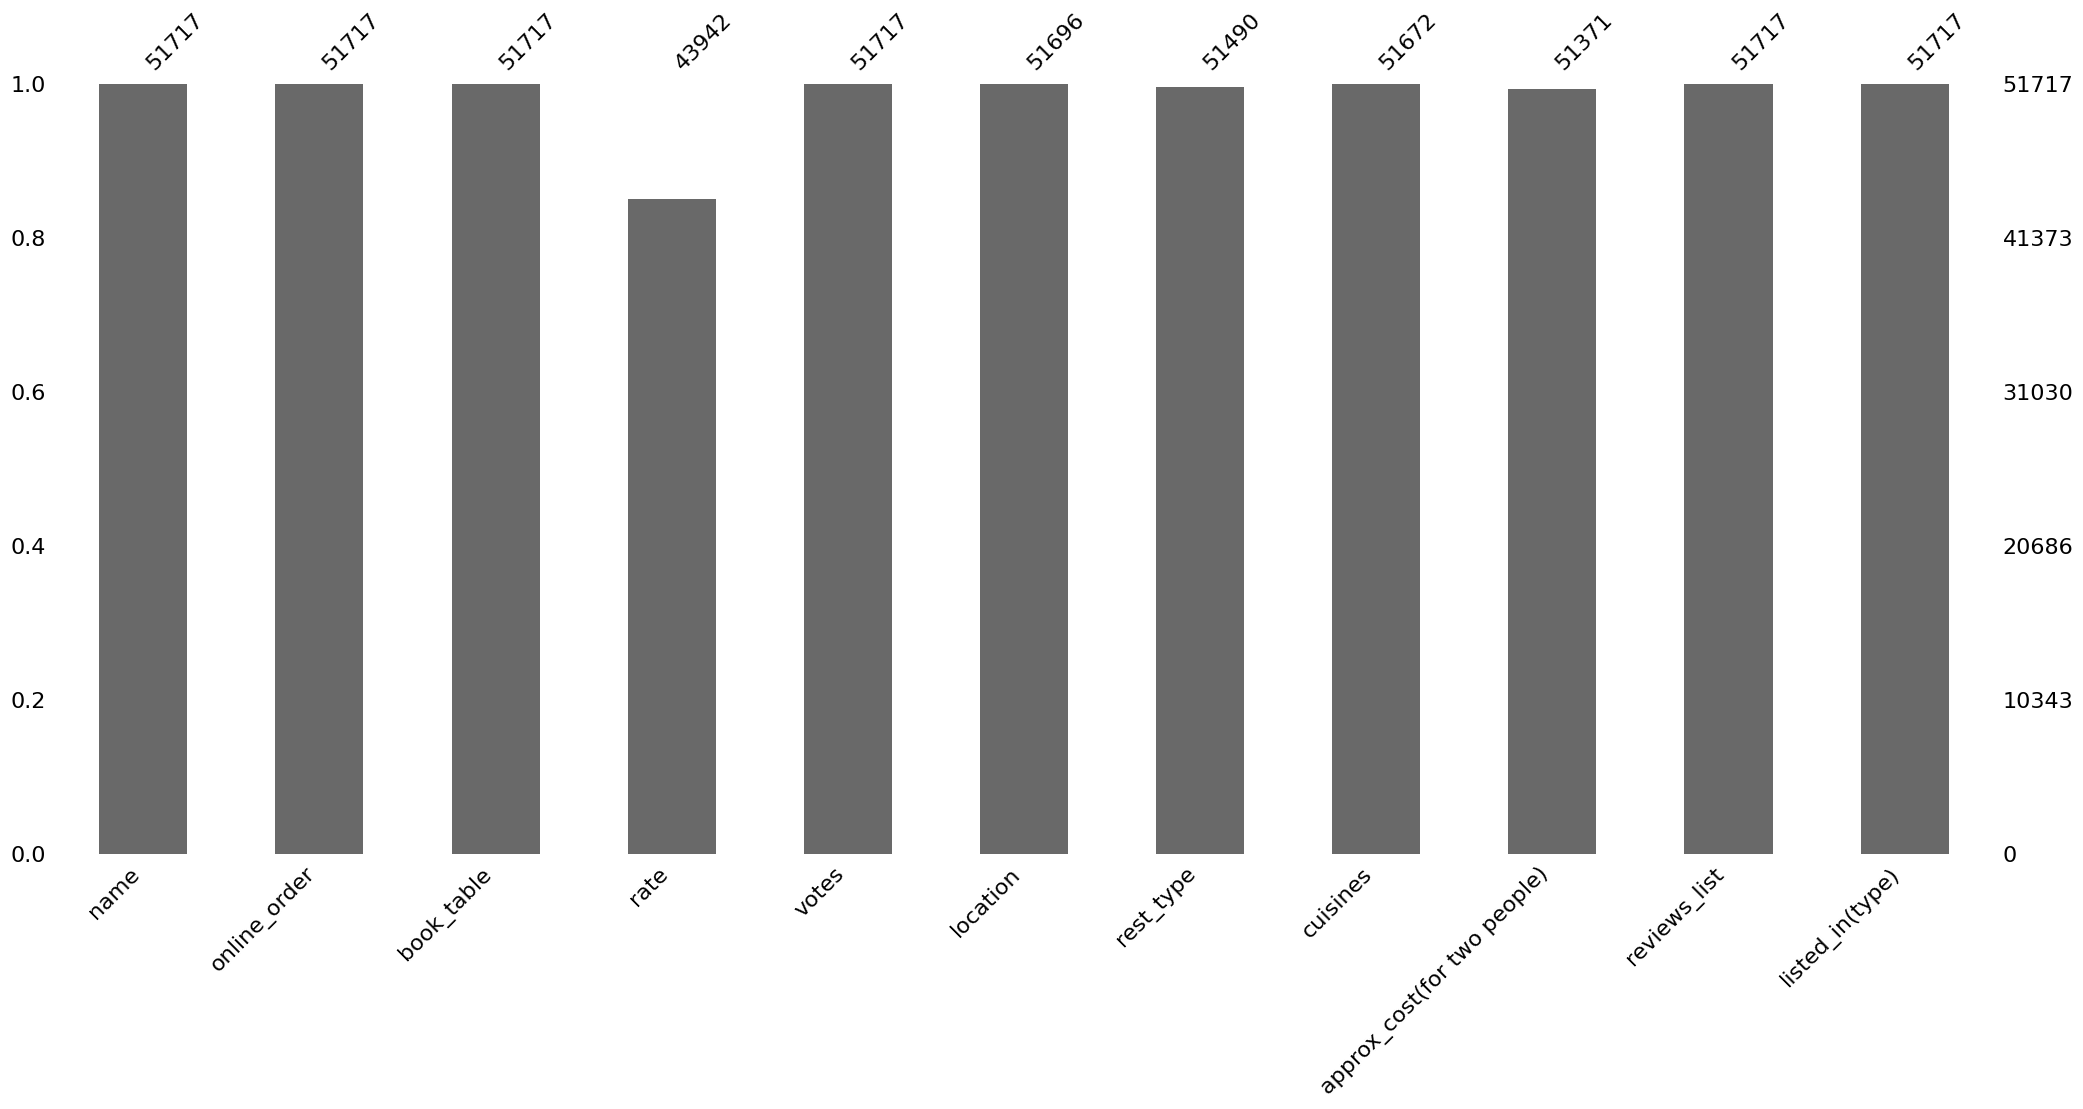

In [19]:
import missingno as msno
msno.bar(df)
plt.show()

In [20]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars


In [21]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)'],
      dtype='object')

In [22]:
df.dropna()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars


In [23]:
df.shape

(51717, 11)

# change name of columns


In [24]:
df=df.rename(columns={'approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','reviews_list':'Review'})

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost', 'Review', 'Type'],
      dtype='object')

In [25]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars


In [26]:
df['Cost'].unique()



###  unique value count???

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [27]:
df['Cost'].nunique()

70

# Type Conversion 
### Because the cost is in str so we have convert it into integer to perform analysis.


In [28]:
#Some transformations
df['Cost']=  df['Cost'].astype(str)
df['Cost'] = df['Cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
df['Cost'] = df['Cost'].astype(float)

In [29]:
df['Cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,  80.  ,
         1.1 , 160.  ,   1.6 , 230.  , 130.  ,  50.  , 190.  ,   1.7 ,
          nan,   1.4 , 180.  ,   1.35,   2.2 ,   2.  ,   1.8 ,   1.9 ,
       330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,   1.25,
         3.5 ,   4.  ,   2.4 ,   2.6 , 120.  ,   1.45, 469.  ,  70.  ,
         3.2 ,  60.  , 560.  , 240.  , 360.  ,   6.  ,   1.05,   2.3 ,
         4.1 ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 , 140.  ])

In [30]:
C_mean=df['Cost'].mean()

In [31]:
df['Cost'].fillna(value=C_mean, inplace=True)

In [32]:
df['Cost'] = df['Cost'].astype(int)

<Axes: xlabel='Cost', ylabel='Density'>

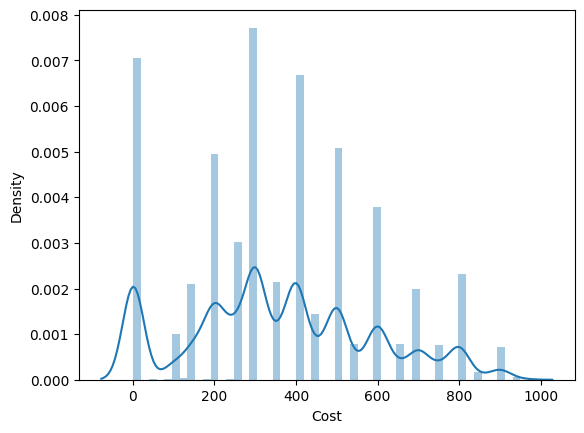

In [33]:
sns.distplot(df['Cost'])

In [34]:
'''#Removing '/5' from Rates
df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()'''

"#Removing '/5' from Rates\ndf['rate'].unique()\ndf = df.loc[df.rate !='NEW']\ndf = df.loc[df.rate !='-'].reset_index(drop=True)\nremove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x\ndf.rate = df.rate.apply(remove_slash).str.strip().astype('float')\ndf['rate'].head()"

In [35]:
# Remove 'NEW' and '-' from rate column
df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != '-'].reset_index(drop=True)

# Remove '/5', strip whitespace, and convert to float
remove_slash = lambda x: x.replace('/5', '').strip() if isinstance(x, str) else x
df.rate = df.rate.apply(remove_slash).astype('float')

print(df['rate'])


0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
49435    3.6
49436    NaN
49437    NaN
49438    4.3
49439    3.4
Name: rate, Length: 49440, dtype: float64


In [36]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [37]:
df.rate.nunique()

31

<Axes: xlabel='rate', ylabel='Density'>

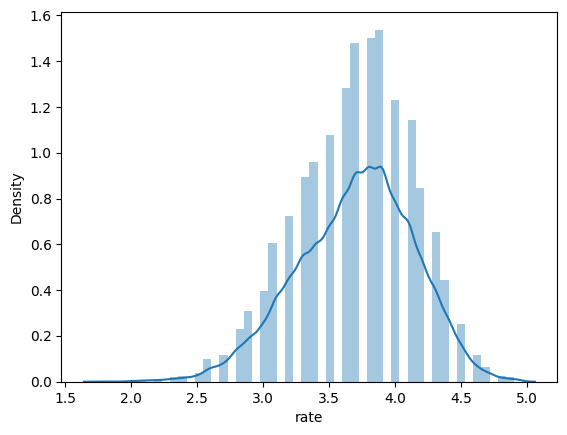

In [38]:
sns.distplot(df['rate'])

In [39]:
df.rate.skew()

-0.3286007981782917

In [40]:
df['votes'].value_counts().head(30)

votes
0     7750
4     1140
6      992
7      872
9      738
11     701
5      667
8      626
10     621
16     535
13     465
12     465
17     452
14     434
23     408
21     400
18     388
24     373
15     372
22     368
19     361
25     329
34     329
20     302
26     290
33     276
31     275
27     269
32     265
28     259
Name: count, dtype: int64

In [41]:
meanVal = df['rate'].mean()
meanVal

3.700448817952718

In [42]:
df['rate'].fillna(value=meanVal, inplace=True)

In [43]:
df.tail()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
49435,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars
49436,Vinod Bar And Restaurant,No,No,3.700449,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars
49437,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700449,0,Whitefield,Bar,Finger Food,2,[],Pubs and bars
49438,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars
49439,The Nest - The Den Bengaluru,No,No,3.400000,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1,"[('Rated 5.0', 'RATED\n Great ambience , look...",Pubs and bars


# Detect Outliers

In [44]:
P0=df.Cost.min()

In [45]:
P100=df.Cost.max()

In [46]:
q1=df.Cost.quantile(.25)

In [47]:
q2=df.Cost.quantile(.5)

In [48]:
q3=df.Cost.quantile(.75)

In [49]:
IQR=q3-q1

In [50]:
LC=q1-1.5*IQR

In [51]:
UC=q3+1.5*IQR

In [52]:
if LC<P0:
    print('No outlier on lower side')
else:
    print('outlier on lower side')
if UC>P100:
    print('No outliers on Higher side')
else:
    print('outliers on Higher side')

No outlier on lower side
outliers on Higher side


In [53]:
print('P0=',P0,'P100=',P100,'q1=',q1,'q2=',q2,'q3=',q3,'IQR=',IQR,'LC=',LC,'UC=',UC)

P0= 1 P100= 950 q1= 200.0 q2= 350.0 q3= 500.0 IQR= 300.0 LC= -250.0 UC= 950.0


In [54]:
n = len(pd.unique(df['Cost']))
print(n)

40


In [55]:
group_by = df.groupby('Cost')['online_order'].nunique
print(group_by)

<bound method SeriesGroupBy.nunique of <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000244C2087340>>


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

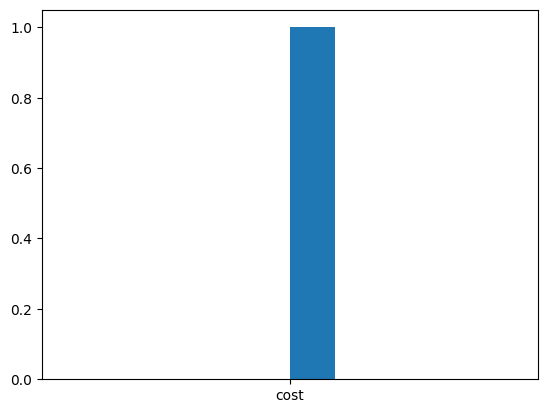

In [56]:
plt.hist(x='cost',data=df)

Text(0.5, 0, 'ONLINE ORDER')

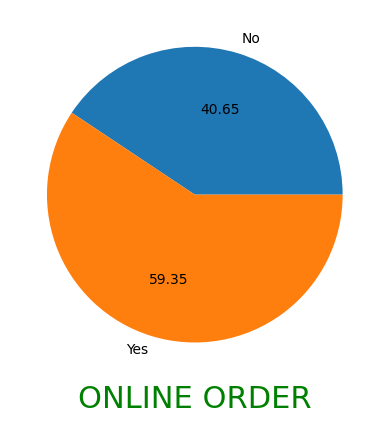

In [57]:
df.groupby('online_order').size().plot(kind='pie', autopct='%.2f').set_xlabel('ONLINE ORDER', size=22,color='g')

Text(0.5, 0, 'BOOK TABLE')

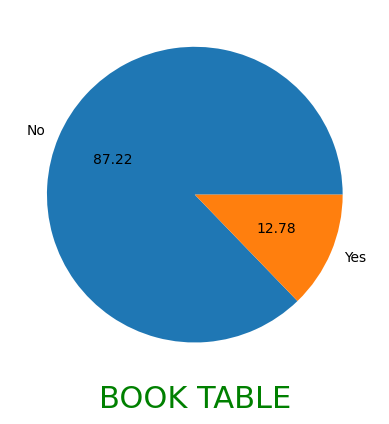

In [58]:
df.groupby('book_table').size().plot(kind='pie', autopct='%.2f').set_xlabel('BOOK TABLE', size=22,color='g')

In [59]:
mean=df.rate.mean()
median=df.rate.median()
mode=df.rate.mode()
print(mean,median,mode)


3.7004488179527177 3.700448817952718 0    3.700449
Name: rate, dtype: float64


In [60]:
df.rate.skew()

-0.3579477962934526

In [61]:
df['Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

<Axes: xlabel='Type', ylabel='count'>

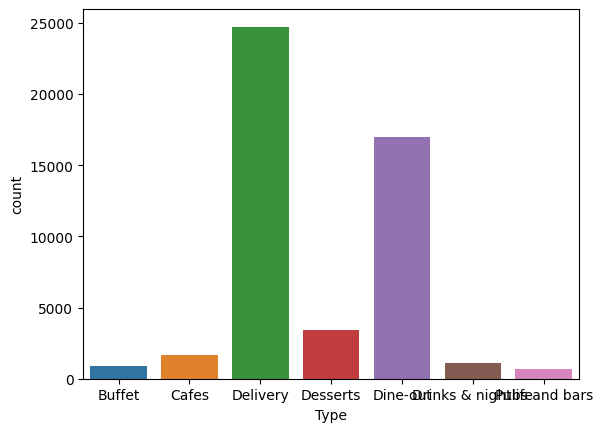

In [62]:
sns.countplot(x='Type',data=df)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          49440 non-null  object 
 1   online_order  49440 non-null  object 
 2   book_table    49440 non-null  object 
 3   rate          49440 non-null  float64
 4   votes         49440 non-null  int64  
 5   location      49419 non-null  object 
 6   rest_type     49215 non-null  object 
 7   cuisines      49395 non-null  object 
 8   Cost          49440 non-null  int32  
 9   Review        49440 non-null  object 
 10  Type          49440 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 4.0+ MB


In [64]:
df['rate'].nunique()

32

In [65]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [66]:
df.rate.nunique()

32

In [67]:
print(df['rate'].value_counts())

rate
3.700449    7775
3.900000    3972
3.800000    3873
3.700000    3821
3.600000    3316
4.000000    3183
4.100000    2948
3.500000    2784
3.400000    2476
3.300000    2310
4.200000    2184
3.200000    1873
4.300000    1693
3.100000    1561
4.400000    1147
3.000000    1023
2.900000     802
4.500000     656
2.800000     600
2.700000     307
4.600000     300
2.600000     260
4.700000     167
2.500000     101
2.400000      70
4.800000      66
4.900000      55
2.300000      51
2.200000      26
2.100000      24
2.000000      11
1.800000       5
Name: count, dtype: int64


In [68]:
print(df['Cost'].value_counts())

Cost
300    7111
400    6290
1      5793
500    4763
200    4503
600    3559
250    2800
800    2162
150    1947
700    1902
350    1704
450    1378
100     929
650     771
750     751
550     750
2       739
900     690
360     342
3       203
850     153
950      60
4        35
120      24
180      20
230      10
50        8
40        8
130       8
80        7
330       4
199       4
190       2
240       2
6         2
140       2
469       1
70        1
60        1
5         1
Name: count, dtype: int64


In [69]:
df.Cost.nunique()

40

# Univariate Plot

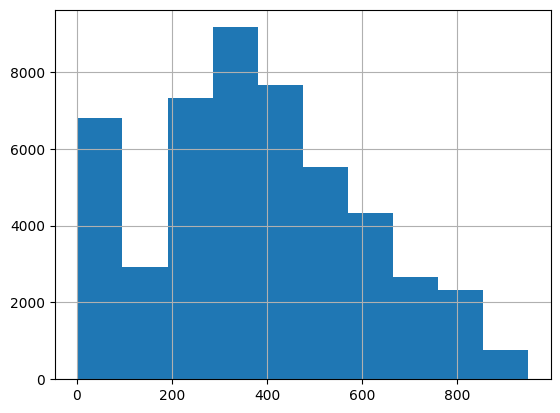

In [70]:
df.Cost.hist()
plt.show()

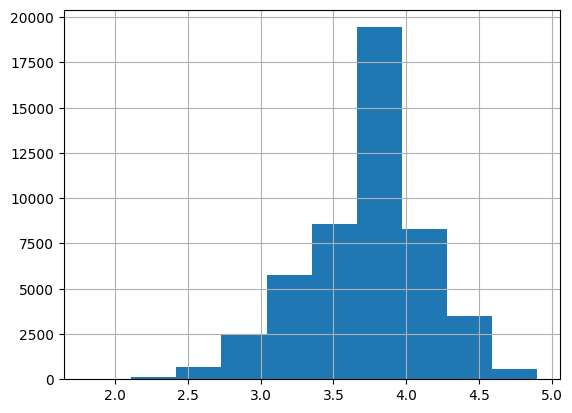

In [71]:
df.rate.hist()
plt.show()

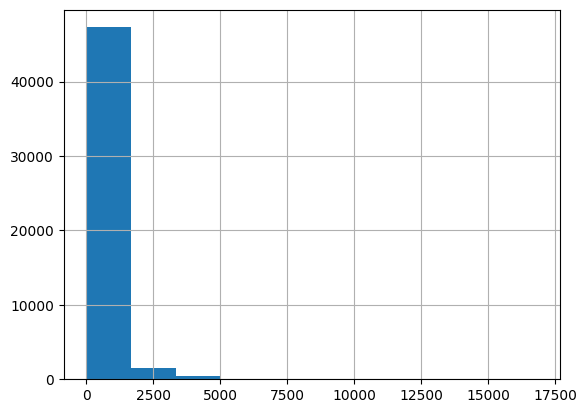

In [72]:
df.votes.hist()
plt.show()

In [73]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [74]:
df.name.nunique()

8458

In [75]:
df.shape

(49440, 11)

<Axes: ylabel='Frequency'>

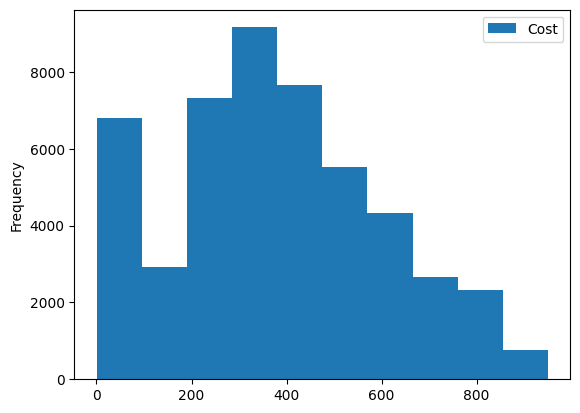

In [76]:
df.plot(x='rate',y='Cost',kind='hist')

<Axes: ylabel='Frequency'>

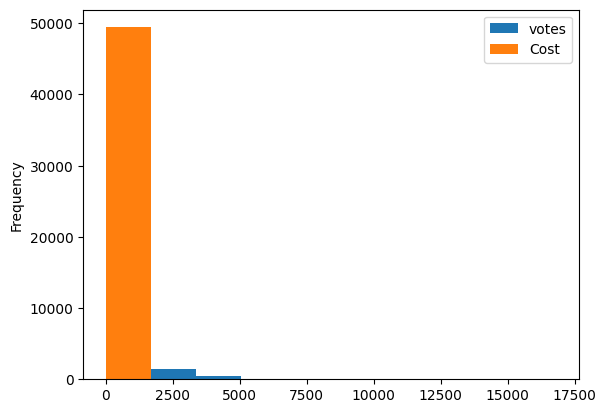

In [77]:
df.plot(x='rate',kind='hist')

In [78]:
df.rate.nunique()

32

In [79]:
df.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [80]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
Cost              int32
Review           object
Type             object
dtype: object

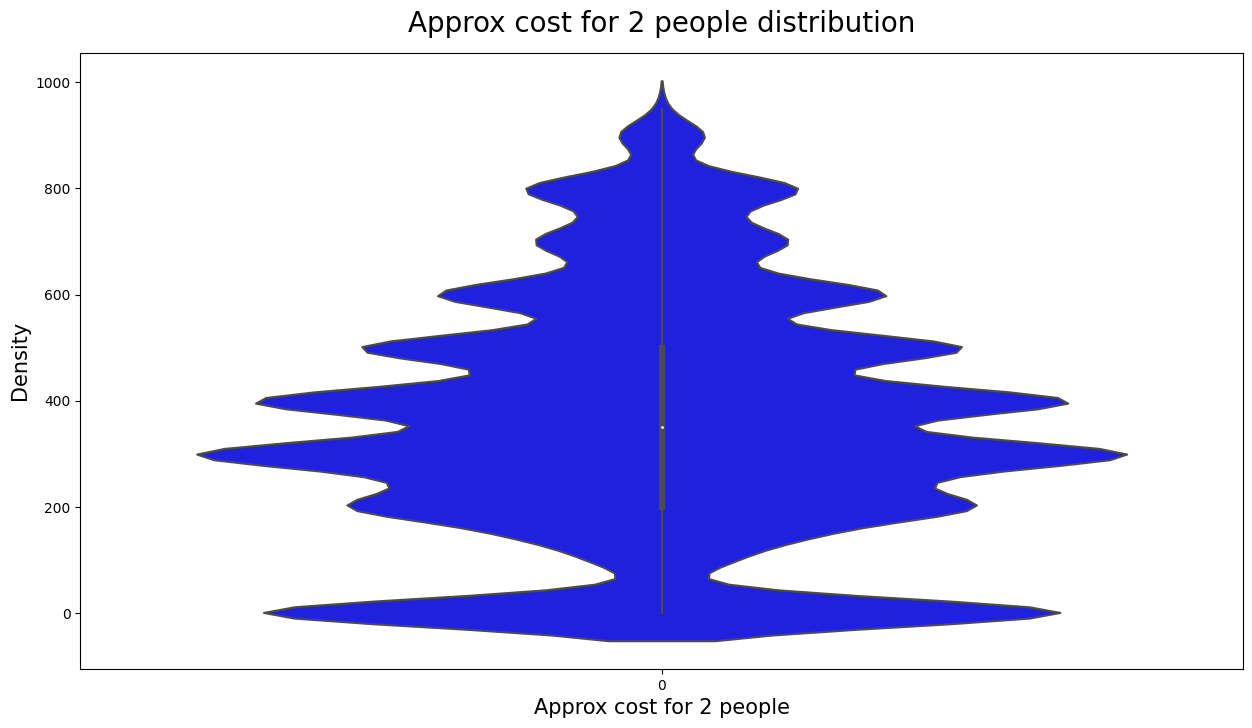

In [81]:
plt.figure(figsize=(15,8))
sns.violinplot(df.Cost,color='b')
plt.title('Approx cost for 2 people distribution', size = 20, pad = 15)
plt.xlabel('Approx cost for 2 people',size = 15)
plt.ylabel('Density',size = 15)
plt.show()

In [82]:
df.Cost.unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100,   1, 350, 250, 950, 199, 230, 130,  80,  50, 190, 360,
       180,   2, 330,   3,  40,   4, 120, 469,  70,  60, 240,   6,   5,
       140])

# Detect outliers


In [83]:
P0=df.Cost.min()

In [84]:
P100=df.Cost.max()

In [85]:
q1=df.Cost.quantile(.25)

In [86]:
q2=df.Cost.quantile(.5)

In [87]:
q3=df.Cost.quantile(.75)

In [88]:
IQR=q3-q1

In [89]:
LC=q1-1.5*IQR

In [90]:
UC=q3+1.5*IQR

In [91]:
if LC<P0:
    print('No outlier on lower side')
else:
    print('outlier on lower side')
if UC>P100:
    print('No outliers on Higher side')
else:
    print("outliers on Higher side")
    


No outlier on lower side
outliers on Higher side


In [92]:
print('P0=',P0,'P100=',P100,'q1=',q1,'q2=',q2,'q3=',q3,'IQR=',IQR,'LC=',LC,'UC=',UC)

P0= 1 P100= 950 q1= 200.0 q2= 350.0 q3= 500.0 IQR= 300.0 LC= -250.0 UC= 950.0


In [93]:
meanVal = df['Cost'].mean()
meanVal

361.25226537216827

In [94]:
df.Cost.unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100,   1, 350, 250, 950, 199, 230, 130,  80,  50, 190, 360,
       180,   2, 330,   3,  40,   4, 120, 469,  70,  60, 240,   6,   5,
       140])

In [95]:
df['Cost'].fillna(value=meanVal, inplace=True)

In [96]:
df.Cost.isnull().sum()

0

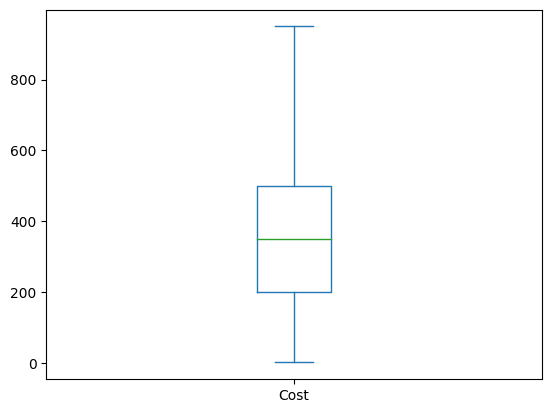

In [97]:
df.Cost.plot(kind='box')
plt.show()

In [98]:
df.head(15)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes


In [99]:
df.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [100]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
Cost              int32
Review           object
Type             object
dtype: object

In [101]:
df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x

In [102]:
df.rate.tail(15)

49425    4.000000
49426    3.900000
49427    4.000000
49428    3.800000
49429    3.700000
49430    3.900000
49431    2.800000
49432    3.700000
49433    3.700449
49434    2.500000
49435    3.600000
49436    3.700449
49437    3.700449
49438    4.300000
49439    3.400000
Name: rate, dtype: float64

In [103]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
Cost              int32
Review           object
Type             object
dtype: object

In [104]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
0,Jalsa,True,True,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,True,False,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,True,False,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,False,False,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,False,False,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
...,...,...,...,...,...,...,...,...,...,...,...
49435,Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.600000,27,Whitefield,Bar,Continental,1,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars
49436,Vinod Bar And Restaurant,False,False,3.700449,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars
49437,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,3.700449,0,Whitefield,Bar,Finger Food,2,[],Pubs and bars
49438,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars


In [105]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'Cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [106]:
df_en.tail(15)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
49425,3608,1,1,4.000000,1094,29,17,1384,1,22068,6
49426,3239,0,0,3.900000,548,29,29,1295,1,22069,6
49427,2854,1,0,4.000000,189,29,44,1163,1,21878,6
49428,3432,0,0,3.800000,128,29,36,1340,1,4467,6
49429,8335,1,1,3.700000,27,29,11,212,1,21898,6
49430,3031,1,1,3.900000,77,29,72,248,2,3941,6
49431,3035,1,1,2.800000,161,29,30,1212,1,3944,6
49432,3234,1,1,3.700000,34,29,30,212,800,4252,6
49433,8340,1,1,3.700449,0,29,17,248,900,21910,6
49434,2030,1,1,2.500000,81,29,30,833,800,22049,6


In [107]:
df.drop(['name'],axis=1, inplace=True)

In [108]:
df_en 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
0,0,0,0,4.100000,775,0,0,0,800,0,0
1,1,0,1,4.100000,787,0,0,1,800,1,0
2,2,0,1,3.800000,918,0,1,2,800,2,0
3,3,1,1,3.700000,88,0,2,3,300,3,0
4,4,1,1,3.800000,166,1,0,4,600,4,0
...,...,...,...,...,...,...,...,...,...,...,...
49435,8344,1,1,3.600000,27,29,17,251,1,21918,6
49436,8349,1,1,3.700449,0,29,17,248,600,89,6
49437,8409,1,1,3.700449,0,29,17,248,2,89,6
49438,8405,1,0,4.300000,236,62,17,248,2,22021,6


In [109]:
mean=df.rate.mean()
median=df.rate.median()
mode=df.rate.mode()

In [110]:
print(mean,median,mode)

3.7004488179527177 3.700448817952718 0    3.700449
Name: rate, dtype: float64


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost', 'Review', 'Type'],
      dtype='object')

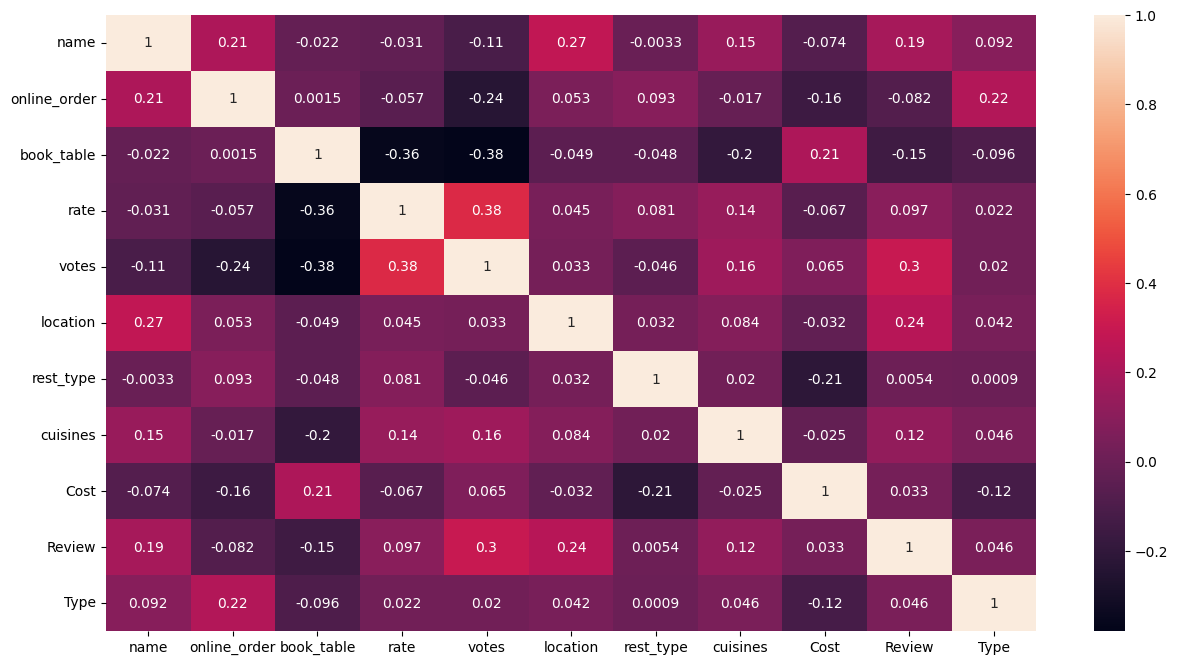

In [111]:
corr = df_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

In [112]:
df_en.dtypes

name              int64
online_order      int64
book_table        int64
rate            float64
votes             int64
location          int64
rest_type         int64
cuisines          int64
Cost              int32
Review            int64
Type              int64
dtype: object

In [113]:
#Defining X and Y for model, Train-test split
x = df_en[["online_order","book_table","votes","location","rest_type","cuisines","Cost","Type"]]
y = df_en['rate']
#Getting Test and Training Set, change test_size to change the train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
x_train.shape, y_train.shape

((39552, 8), (39552,))

In [114]:
df_en.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost            0
Review          0
Type            0
dtype: int64

In [115]:
#Prepare a Linear REgression Model
L=LinearRegression()
L.fit(x_train,y_train)
y_pred=L.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2727866095344129

In [116]:
y_test.shape

(9888,)

In [117]:
y_pred.shape

(9888,)

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
df_en1=df_en.dropna(subset=['rate'])

In [121]:
df_en1

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Review,Type
0,0,0,0,4.100000,775,0,0,0,800,0,0
1,1,0,1,4.100000,787,0,0,1,800,1,0
2,2,0,1,3.800000,918,0,1,2,800,2,0
3,3,1,1,3.700000,88,0,2,3,300,3,0
4,4,1,1,3.800000,166,1,0,4,600,4,0
...,...,...,...,...,...,...,...,...,...,...,...
49435,8344,1,1,3.600000,27,29,17,251,1,21918,6
49436,8349,1,1,3.700449,0,29,17,248,600,89,6
49437,8409,1,1,3.700449,0,29,17,248,2,89,6
49438,8405,1,0,4.300000,236,62,17,248,2,22021,6


# Decision Tree

In [122]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8437662588871969

In [123]:
y_predict

array([4.        , 3.54      , 4.3       , ..., 4.2       , 3.70044882,
       4.3       ])

In [124]:
type(y_predict)

numpy.ndarray

In [125]:
type(y_test)

pandas.core.series.Series

In [126]:
y_test=y_test.astype('float64')

In [127]:
y_test.shape

(4944,)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.07646676852264395


In [130]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8704015694619194

In [131]:
from xgboost import XGBRegressor

In [132]:

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

score=r2_score(y_test,y_predict)


In [133]:
print(score)

0.9660944316587996


In [134]:
import joblib

# Save the trained model to a file
model_filename = 'xgb_regression_model.pkl'
joblib.dump(xgb, model_filename)

['xgb_regression_model.pkl']

In [135]:
from flask import Flask, request, jsonify
import joblib
from xgboost import XGBRegressor

app = Flask(__name__)

# Load the trained XGBoost model
model_filename = 'xgb_regression_model.pkl'
xgb = joblib.load(model_filename)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = data['features']
        
        # Make predictions using the loaded model
        predictions = xgb.predict([features])
        
        return jsonify({'predictions': predictions.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.29.180:5000
Press CTRL+C to quit


In [136]:
!pip install --upgrade flask jinja2

In [137]:
!pip show flask
!pip show jinja2


Name: Flask
Version: 2.3.2
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: Armin Ronacher <armin.ronacher@active-4.com>
License: BSD-3-Clause
Location: c:\users\91701\anaconda3\lib\site-packages
Requires: blinker, click, importlib-metadata, itsdangerous, Jinja2, Werkzeug
Required-by: 


Name: Jinja2
Version: 3.1.2
Summary: A very fast and expressive template engine.
Home-page: https://palletsprojects.com/p/jinja/
Author: Armin Ronacher
Author-email: armin.ronacher@active-4.com
License: BSD-3-Clause
Location: c:\users\91701\anaconda3\lib\site-packages
Requires: MarkupSafe
Required-by: altair, anaconda-project, bokeh, conda-build, conda-verify, Flask, jupyter-server, jupyterlab, jupyterlab-server, klib, nbconvert, notebook, numpydoc, pandas-profiling, pydeck, Sphinx


In [ ]:
from flask import Flask, request, jsonify
import joblib
from xgboost import XGBRegressor

app = Flask(__name__)

# Load the trained XGBoost model
model_filename = 'xgb_regression_model.pkl'
xgb = joblib.load(model_filename)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = data['features']
        
        # Make predictions using the loaded model
        predictions = xgb.predict([features])
        
        return jsonify({'predictions': predictions.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.29.180:5000
Press CTRL+C to quit
192.168.29.180 - - [11/Aug/2023 18:34:57] "GET / HTTP/1.1" 404 -
192.168.29.180 - - [11/Aug/2023 18:35:22] "GET / HTTP/1.1" 404 -
192.168.29.180 - - [11/Aug/2023 18:38:05] "GET / HTTP/1.1" 404 -


In [ ]:
curl -X POST -H "Content-Type: application/json" -d '{"features": [1.0, 2.0, 3.0]}' http://127.0.0.1:5000/predict


In [1]:
import os

model_filename = 'xgb_regression_model.pkl'
model_path = os.path.abspath(model_filename)

print("Model File Location:", model_path)


Model File Location: C:\Users\91701\001 iNeuron\intenship\xgb_regression_model.pkl
